# KS_Covid-19

### Načítanie knižníc

In [114]:
# nacitanie kniznic pre analýzu dát
import pandas as pd
import numpy as np

# nacitanie kniznic pre rozhodovacie stromy
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# kniznica na zobrazenie frame-u
from IPython.display import IFrame

# knižnice pre znázornenie rozhodovacieho stromu
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image

### Načítanie datasetu

In [115]:
# dataset sa nachadza na tejto adrese: https://www.kaggle.com/bitsofishan/covid19-patient-symptoms
IFrame('https://www.kaggle.com', width = 800, height = 300)

# u mna je lokalizovany lokalne v projekte
# nacitam jeho cestu
csv_file_path = "../db/COVID-19-Survey.csv"


In [116]:
# nazvy stlpcov, s ktorymi budeme pracovat
col_names1 = ['age', 'gender','body-temperature', 'dry-cough', 'sour-throat', 'breathing-problem', 'wearness', 'drowsiness', 'pain-in-chest', 'diabetes','change-in-sns','travel-history']

# nacitame dataset
covid_csv = pd.read_csv(csv_file_path, sep=";")

#### Názvy stĺpcov a ich vysvetlenie
 V .csv súbore sa nachádza **127** riadkov a **13** stĺpcov.

Všetky stĺpce slúžia k zisteniu choroby Covid-19 u účastníka ankety, zároveň všetky stĺpce (okrem `age` a `gender`) sú príznakmi tejto choroby.

- `age` - vek respondenta
- `gender` - pohlavie respondenta
- `body-temperature` - aktuálna teplota respondenta
- `dry-cough` - odpoveď respondenta, či má suchý kašeľ
- `sour-throat` - odpoveď respondenta, či trpí bolesťami hrdla
- `breathing-problem` - odpoveď respondenta, či trpí ťažkosťami s dýchaním
- `weakness` - odpoveď respondenta, či cití slabosť
- `drowsiness` -odpoveď respondenta, či cíti ospalosť
- `change-in-sns` - odpoveď respondenta, či postrehol stratu chuti a čuchu
- `travel-history` - odpoveď respondenta, či v nedávnej dobe cestoval do inej krajiny postihnutej Covidom-19
- `result` - výsledok testu


In [117]:
# hlavička datasetu
covid_csv.head(5)

,age,gender,body-temperature,dry-cough,sour-throat,breathing-problem,pain-in-chest,weakness,drowsiness,diabetes,change-in-sns,travel-history,result
0,20,F,37.0,0,0,0,0,0,0,0,0,0,0
1,19,F,37.2,1,0,0,0,0,0,0,0,0,0
2,55,M,38.9,1,1,1,1,1,1,0,1,0,1
3,40,M,37.8,0,0,0,1,0,1,1,1,1,2
4,33,F,37.3,0,1,1,0,0,0,0,1,1,2


In [118]:
# počet, priemer, max, min jednotlivých stĺpcov
covid_csv.describe()

,age,body-temperature,dry-cough,sour-throat,breathing-problem,pain-in-chest,weakness,drowsiness,diabetes,change-in-sns,travel-history,result
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,36.456693,37.794488,0.488189,0.551181,0.433071,0.370079,0.409449,0.425197,0.244094,0.629921,0.464567,0.937008
std,14.052484,0.870532,0.501840,0.499343,0.497463,0.484738,0.493680,0.496331,0.431250,0.484738,0.500718,0.675513
min,18.000000,35.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.500000,37.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,37.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,45.000000,38.550000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,80.000000,39.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [119]:
# dátové typy jednotlivých stĺpcov
covid_csv.dtypes

age                    int64
gender                object
body-temperature     float64
dry-cough              int64
sour-throat            int64
breathing-problem      int64
pain-in-chest          int64
weakness               int64
drowsiness             int64
diabetes               int64
change-in-sns          int64
travel-history         int64
result                 int64
dtype: object

In [120]:
# v datasete sa nachadza okrem ciselnych aj jeden stlpec s kategorialnou premennou
# get dummies prehodi kategorialne premenne na ciselne
new_covid_csv = pd.get_dummies(covid_csv, columns=["gender"], drop_first=False)

In [121]:
# vytvorenie noveho suboru, s ktorym budeme pracovat
new_covid_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                127 non-null    int64  
 1   body-temperature   127 non-null    float64
 2   dry-cough          127 non-null    int64  
 3   sour-throat        127 non-null    int64  
 4   breathing-problem  127 non-null    int64  
 5   pain-in-chest      127 non-null    int64  
 6   weakness           127 non-null    int64  
 7   drowsiness         127 non-null    int64  
 8   diabetes           127 non-null    int64  
 9   change-in-sns      127 non-null    int64  
 10  travel-history     127 non-null    int64  
 11  result             127 non-null    int64  
 12  gender_F           127 non-null    uint8  
 13  gender_M           127 non-null    uint8  
dtypes: float64(1), int64(11), uint8(2)
memory usage: 12.3 KB


In [122]:
# rozdelenie do trénovacej a testovacej množiny v pomere 80 : 20
X = new_covid_csv[['dry-cough', 'sour-throat', 'breathing-problem', 'weakness', 'drowsiness', 'pain-in-chest', 'diabetes','change-in-sns','travel-history', 'gender_F', 'gender_M']]
y = new_covid_csv['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)

In [124]:
# Alt+ Shift + B
clf = clf.fit(X_train,y_train)

In [125]:
y_pred = clf.predict(X_test)

In [126]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6153846153846154


In [127]:
from sklearn.metrics import confusion_matrix

#meranie výkonu klasifikácie strojového učenia
print(confusion_matrix(y_test, y_pred))

[[ 3  2  2]
 [ 1 10  2]
 [ 0  3  3]]


### Generovanie rozhodovacieho stromu

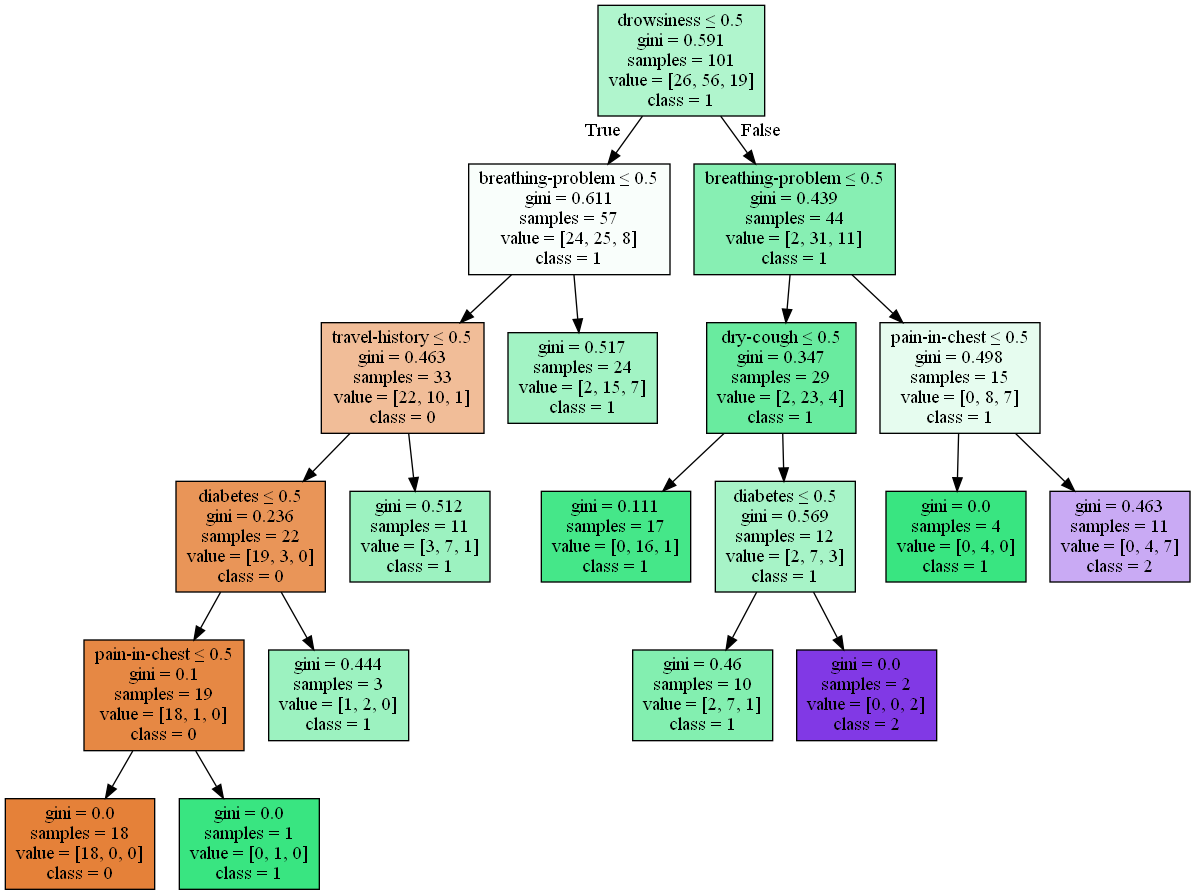

In [128]:
col_names2 = ['dry-cough', 'sour-throat', 'breathing-problem', 'weakness', 'drowsiness', 'pain-in-chest', 'diabetes','change-in-sns','travel-history', 'gender_F', 'gender_M']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=False,
                special_characters=True,
                feature_names = col_names2,
                class_names=['0', '1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('skuska.png')
Image(graph.create_png())

In [129]:

# rozhodovaci strom

import numpy as np
from sklearn.tree import _tree

def tree_to_code(tree, feature_names, Y, max_leaf_nodes = 10):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent], tree_.value[node])
    recurse(0, 1, 0)


In [130]:
tree_to_code(clf, col_names2, y_train)

1 ) drowsiness <= 0.5  & breathing-problem <= 0.5  & travel-history <= 0.5  & diabetes <= 0.5  & pain-in-chest <= 0.5  [[18.  0.  0.]]
2 ) drowsiness <= 0.5  & breathing-problem <= 0.5  & travel-history <= 0.5  & diabetes <= 0.5  & pain-in-chest > 0.5 [[0. 1. 0.]]
3 ) drowsiness <= 0.5  & breathing-problem <= 0.5  & travel-history <= 0.5  & diabetes > 0.5 [[1. 2. 0.]]
4 ) drowsiness <= 0.5  & breathing-problem <= 0.5  & travel-history > 0.5 [[3. 7. 1.]]
5 ) drowsiness <= 0.5  & breathing-problem > 0.5 [[ 2. 15.  7.]]
6 ) drowsiness > 0.5 & breathing-problem <= 0.5  & dry-cough <= 0.5  [[ 0. 16.  1.]]
7 ) drowsiness > 0.5 & breathing-problem <= 0.5  & dry-cough > 0.5 & diabetes <= 0.5  [[2. 7. 1.]]
8 ) drowsiness > 0.5 & breathing-problem <= 0.5  & dry-cough > 0.5 & diabetes > 0.5 [[0. 0. 2.]]
9 ) drowsiness > 0.5 & breathing-problem > 0.5 & pain-in-chest <= 0.5  [[0. 4. 0.]]
10 ) drowsiness > 0.5 & breathing-problem > 0.5 & pain-in-chest > 0.5 [[0. 4. 7.]]
